In [66]:
# project uses the caltech101 dataset found here https://data.caltech.edu/records/mzrjq-6wc02

%pip install tensorflow
%pip install keras
%pip install matplotlib
%pip install tensorflow_datasets
%pip install numpy
%pip install seaborn
%pip install scikit-learn

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Le'ts inspect the data

In [67]:
train_data, val_data, test_data = tfds.load('caltech101', split=['train[:80%]', 'train[80%:]', 'test'], shuffle_files=True, as_supervised=True)

print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(1):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

info = tfds.builder('caltech101').info
class_names = info.features['label'].names
print(f"Total classes: {len(class_names)}")



Training set size: 2448
Validation set size: 612
Test set size: 6084
Image shape: (297, 300, 3)
Label: 10
Total classes: 102


### print some image samples

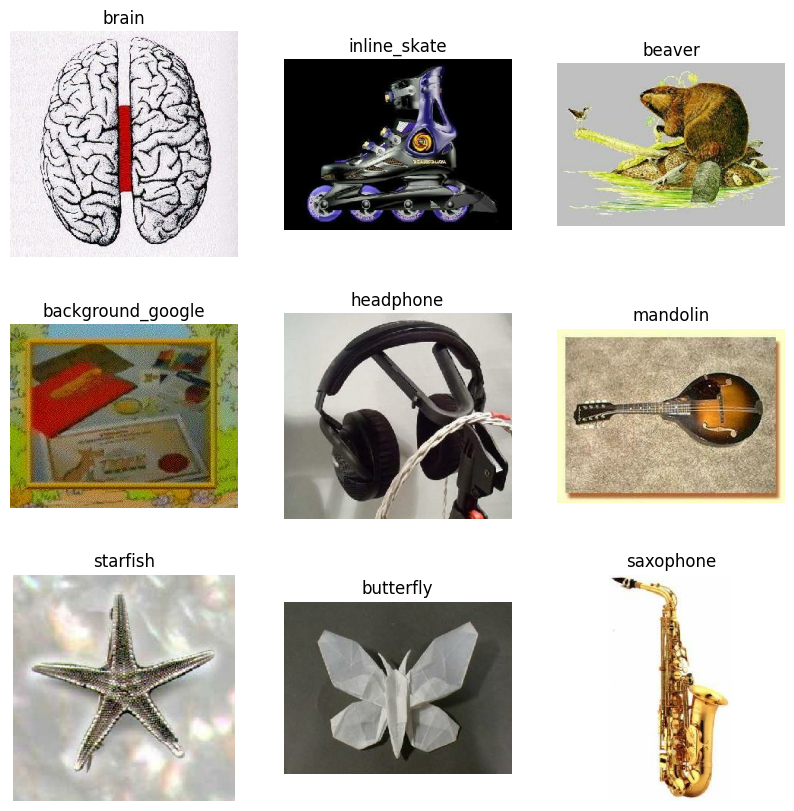

In [68]:
fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

### let's see how many data points do we have per class

In [69]:

import collections
label_counts = collections.Counter([label.numpy() for _, label in train_data])
print(label_counts)


Counter({54: 29, 46: 28, 16: 28, 47: 27, 40: 27, 52: 27, 58: 27, 72: 27, 98: 27, 96: 27, 55: 27, 29: 27, 27: 27, 100: 27, 21: 27, 94: 26, 43: 26, 15: 26, 74: 26, 59: 26, 30: 26, 84: 26, 75: 26, 20: 26, 0: 26, 51: 25, 7: 25, 45: 25, 97: 25, 36: 25, 73: 25, 17: 25, 44: 25, 65: 25, 81: 25, 31: 25, 77: 25, 89: 25, 83: 25, 4: 24, 13: 24, 70: 24, 8: 24, 92: 24, 23: 24, 25: 24, 39: 24, 50: 24, 12: 24, 9: 24, 28: 24, 91: 24, 53: 24, 3: 24, 68: 24, 69: 24, 95: 24, 85: 24, 71: 24, 22: 24, 41: 24, 33: 24, 6: 24, 24: 24, 10: 23, 88: 23, 78: 23, 67: 23, 19: 23, 101: 23, 35: 23, 93: 23, 90: 23, 80: 23, 38: 23, 2: 23, 63: 23, 32: 23, 34: 23, 61: 22, 87: 22, 79: 22, 26: 22, 56: 22, 48: 22, 42: 22, 5: 22, 14: 22, 11: 22, 66: 22, 99: 21, 60: 21, 1: 21, 64: 21, 18: 21, 37: 21, 76: 20, 82: 20, 86: 20, 57: 19, 62: 19, 49: 18})


### getting our class names

In [70]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: background_google
5: barrel
6: bass
7: beaver
8: binocular
9: bonsai
10: brain
11: brontosaurus
12: buddha
13: butterfly
14: camera
15: cannon
16: car_side
17: ceiling_fan
18: cellphone
19: chair
20: chandelier
21: cougar_body
22: cougar_face
23: crab
24: crayfish
25: crocodile
26: crocodile_head
27: cup
28: dalmatian
29: dollar_bill
30: dolphin
31: dragonfly
32: electric_guitar
33: elephant
34: emu
35: euphonium
36: ewer
37: faces
38: faces_easy
39: ferry
40: flamingo
41: flamingo_head
42: garfield
43: gerenuk
44: gramophone
45: grand_piano
46: hawksbill
47: headphone
48: hedgehog
49: helicopter
50: ibis
51: inline_skate
52: joshua_tree
53: kangaroo
54: ketch
55: lamp
56: laptop
57: leopards
58: llama
59: lobster
60: lotus
61: mandolin
62: mayfly
63: menorah
64: metronome
65: minaret
66: motorbikes
67: nautilus
68: octopus
69: okapi
70: pagoda
71: panda
72: pigeon
73: pizza
74: platypus
75: pyramid
76: revolver
77: rhino
78: r

### background_google seems to be a garbage class since it contains a lot of images that are just random and not related, let's exclude it from the datasets

Training set size after filtering: 2424
Validation set size after filtering: 606
Test set size after filtering: 5647


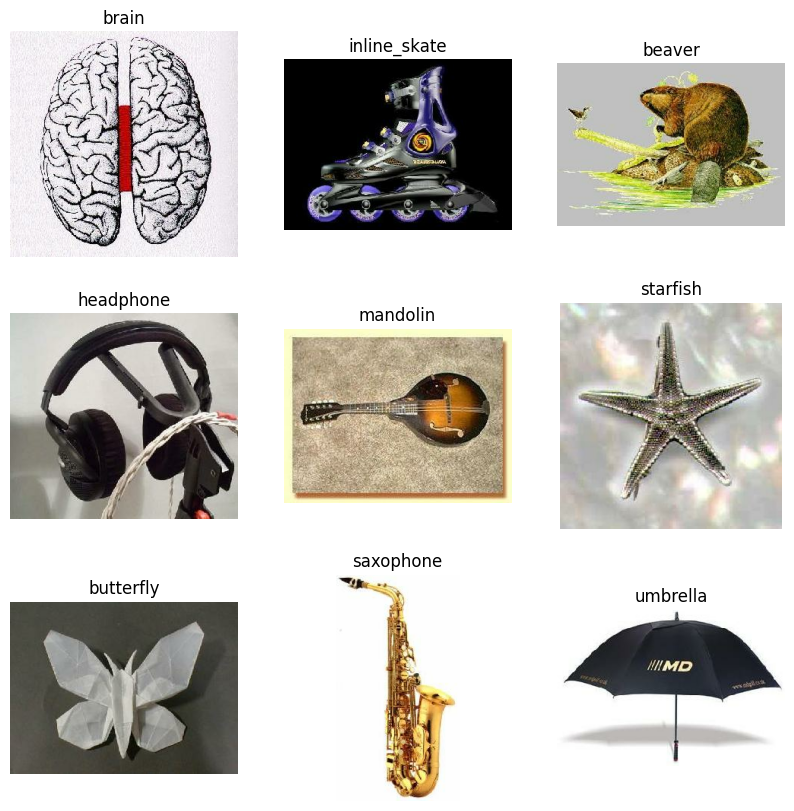

In [71]:
# get class names and find the index of "background_google" class
info = tfds.builder('caltech101').info
class_names = info.features['label'].names
google_background_index = class_names.index("background_google")

# remove "background_google" from the class names list
class_names = [name for name in class_names if name != "background_google"]

def filter_google_background(image, label):
    return tf.not_equal(label, google_background_index)

# filter the garbage class
train_data = train_data.filter(filter_google_background)
val_data = val_data.filter(filter_google_background)
test_data = test_data.filter(filter_google_background)

# adjust labels to account for the removal of "background_google"
def adjust_labels(image, label):
    return image, tf.where(label > google_background_index, label - 1, label)

train_data = train_data.map(adjust_labels)
val_data = val_data.map(adjust_labels)
test_data = test_data.map(adjust_labels)

print(f"Training set size after filtering: {len(list(train_data))}")
print(f"Validation set size after filtering: {len(list(val_data))}")
print(f"Test set size after filtering: {len(list(test_data))}")

fig = plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    ax = fig.add_subplot(3, 3, i + 1)
    ax.imshow(image.numpy())
    ax.set_title(class_names[label.numpy()])
    ax.axis('off')
plt.show()

### background_google should be gone, all the classes and labels were also adjusted properly

In [72]:
# Print all label names
print("Class Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Class Names:
0: accordion
1: airplanes
2: anchor
3: ant
4: barrel
5: bass
6: beaver
7: binocular
8: bonsai
9: brain
10: brontosaurus
11: buddha
12: butterfly
13: camera
14: cannon
15: car_side
16: ceiling_fan
17: cellphone
18: chair
19: chandelier
20: cougar_body
21: cougar_face
22: crab
23: crayfish
24: crocodile
25: crocodile_head
26: cup
27: dalmatian
28: dollar_bill
29: dolphin
30: dragonfly
31: electric_guitar
32: elephant
33: emu
34: euphonium
35: ewer
36: faces
37: faces_easy
38: ferry
39: flamingo
40: flamingo_head
41: garfield
42: gerenuk
43: gramophone
44: grand_piano
45: hawksbill
46: headphone
47: hedgehog
48: helicopter
49: ibis
50: inline_skate
51: joshua_tree
52: kangaroo
53: ketch
54: lamp
55: laptop
56: leopards
57: llama
58: lobster
59: lotus
60: mandolin
61: mayfly
62: menorah
63: metronome
64: minaret
65: motorbikes
66: nautilus
67: octopus
68: okapi
69: pagoda
70: panda
71: pigeon
72: pizza
73: platypus
74: pyramid
75: revolver
76: rhino
77: rooster
78: saxophone
7

### normalize the data and generate new augmented data from the original training set 

In [73]:
def resize_image(image, label):
    image = tf.image.resize(image, [128, 128])
    return image, label

train_data = train_data.map(resize_image)
val_data = val_data.map(resize_image)
test_data = test_data.map(resize_image)

def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize_image)
val_data = val_data.map(normalize_image)
test_data = test_data.map(normalize_image)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomZoom(0.15),
    tf.keras.layers.RandomTranslation(0.15, 0.15)
])

def augment_image(image, label):
    image = data_augmentation(image)
    return image, label

def generate_augmented_data(train_data, number_of_augments):
    augmented_datasets = [train_data]  # original data

    for _ in range(number_of_augments):
        augmented_data = train_data.map(augment_image)
        augmented_datasets.append(augmented_data)

    # add new data to original dsta
    full_train_data = augmented_datasets[0]
    for aug_data in augmented_datasets[1:]:
        full_train_data = full_train_data.concatenate(aug_data)

    return full_train_data

train_data = generate_augmented_data(train_data, number_of_augments=2)
train_data_size = len(list(train_data))
train_data = train_data.shuffle(buffer_size=train_data_size)

def edge_detection(image, label):
    image_gray = tf.image.rgb_to_grayscale(image)
    image_gray = tf.expand_dims(image_gray, axis=0)
    edges = tf.image.sobel_edges(image_gray)
    edge_x = edges[..., 0]
    edge_y = edges[..., 1]
    edges = tf.sqrt(tf.square(edge_x) + tf.square(edge_y))
    edges = tf.squeeze(edges, axis=0)
    edges = tf.clip_by_value(edges, 0.0, 1.0)
    return edges, label

train_data = train_data.map(edge_detection)
val_data = val_data.map(edge_detection)
test_data = test_data.map(edge_detection)

# batch and prefetch data
train_data = train_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_data = val_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [74]:
print(f"Training set size: {len(list(train_data))}")
print(f"Validation set size: {len(list(val_data))}")
print(f"Test set size: {len(list(test_data))}")

for image, label in train_data.take(10):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")

Training set size: 227
Validation set size: 18
Test set size: 176
Image shape: (32, 128, 128, 1)
Label: [80 59 75 85 76 20 65 62 88 61 60 51 35 65 68 32 51 55 18 95 10 91 33 39
 50 59 62 22 28 36 21 17]
Image shape: (32, 128, 128, 1)
Label: [54 27 26 13 86 65 85 93 65 58 44 74 20  8 42 87 39 61  0 58 28 29  7 56
 68 97 13 69 60 60 82 54]
Image shape: (32, 128, 128, 1)
Label: [98 84 52 87 20 90 84 22 54 36 54 45 48 67 48 66 77 29 20 91 23 61 32 36
 45  5 26 41 78 65 99 29]
Image shape: (32, 128, 128, 1)
Label: [ 38  85   4  66   0  17  54  25  68  69  88  26  29  23  74  39  83   6
  40  73  51  15  76  40 100  47  12  79  26   0  19  19]
Image shape: (32, 128, 128, 1)
Label: [ 49  12  55  25  39  93  94 100  34  72  77  21   9  25  35  86 100  91
  66   0  72  67  42  33   7  54  60  22  11  64  36  62]
Image shape: (32, 128, 128, 1)
Label: [74 53 57 46  7 30 18 43 56  0 88 57 20 35 76 50  3 10 28  4 74  8 85  7
 46 96 32 84 79 12 54 74]
Image shape: (32, 128, 128, 1)
Label: [78 31 20 

### utility function to print some performance metrics for the models

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def print_results():
    # extract test images and labels from the test dataset
    test_images, test_labels = zip(*[(image, label) for image, label in tfds.as_numpy(test_data)])
    test_images = np.array([image for batch in test_images for image in batch])
    test_labels = np.array([label for batch in test_labels for label in batch])

    # generate predictions
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # accuracy
    accuracy = accuracy_score(test_labels, predicted_classes)
    print(f"accuracy: {accuracy * 100:.2f}%")

    # precision, Recall, and F1 score (per class and average)
    precision = precision_score(test_labels, predicted_classes, average=None)
    recall = recall_score(test_labels, predicted_classes, average=None)
    f1 = f1_score(test_labels, predicted_classes, average=None)
    print("\nprecision, recall, F1 score for each class:")
    for i, class_name in enumerate(class_names[:101]):  # slice to ensure 101 items
        print(f"{class_name}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1 Score={f1[i]:.2f}")

    # average scores
    avg_precision = precision_score(test_labels, predicted_classes, average='weighted')
    avg_recall = recall_score(test_labels, predicted_classes, average='weighted')
    avg_f1 = f1_score(test_labels, predicted_classes, average='weighted')
    print(f"\naverage precision: {avg_precision:.2f}")
    print(f"average recall: {avg_recall:.2f}")
    print(f"average F1 score: {avg_f1:.2f}")

    # full Classification Report
    print("\nclassification report:")
    print(classification_report(test_labels, predicted_classes, target_names=class_names[:101]))  # Ensure 101 target names

    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.show()


### ensure that the model doesn't run out of data while training


In [76]:
# train_data = train_data.repeat()
# val_data = val_data.repeat()

# batch_size = 32

# train_data_size = tf.data.experimental.cardinality(train_data).numpy()
# steps_per_epoch = train_data_size // batch_size

### base or default model

Epoch 1/10
    227/Unknown 36s 120ms/step - accuracy: 0.0301 - loss: 4.5147

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - accuracy: 0.0302 - loss: 4.5137 - val_accuracy: 0.1760 - val_loss: 3.5410
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - accuracy: 0.2038 - loss: 3.5154 - val_accuracy: 0.3372 - val_loss: 2.8397
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 35s 119ms/step - accuracy: 0.3284 - loss: 2.8526 - val_accuracy: 0.3586 - val_loss: 2.6662
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 108ms/step - accuracy: 0.3965 - loss: 2.5520 - val_accuracy: 0.3684 - val_loss: 2.5444
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 35s 118ms/step - accuracy: 0.4585 - loss: 2.2802 - val_accuracy: 0.3964 - val_loss: 2.5433
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 33s 111ms/step - accuracy: 0.4946 - loss: 2.1765 - val_accuracy: 0.4062 - val_loss: 2.4704
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 108ms/step - accuracy: 0.5301 - loss: 1.9424 - val_accuracy: 0.4293 - val_loss: 2.4295
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 108ms/step - accuracy: 0.5535 - loss: 1.8609 - val

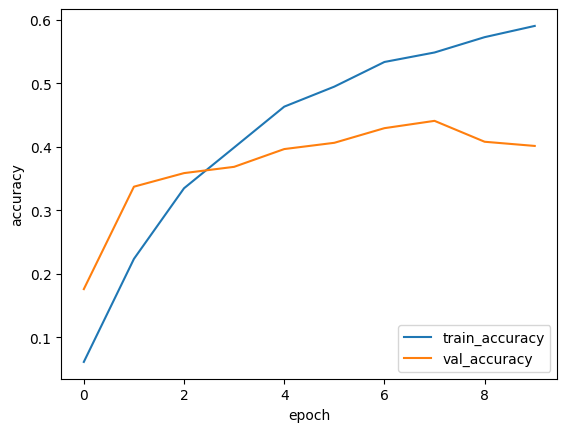

In [77]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


### we are noticing some overfitting, introduce small dropout before the output layer

Epoch 1/10


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 34s 110ms/step - accuracy: 0.0148 - loss: 4.6040

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step - accuracy: 0.0149 - loss: 4.6036 - val_accuracy: 0.0641 - val_loss: 4.0931
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 34s 118ms/step - accuracy: 0.0745 - loss: 4.1770 - val_accuracy: 0.1431 - val_loss: 3.6414
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 105ms/step - accuracy: 0.1328 - loss: 3.7703 - val_accuracy: 0.2319 - val_loss: 3.2347
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 109ms/step - accuracy: 0.1991 - loss: 3.4530 - val_accuracy: 0.2944 - val_loss: 2.9973
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - accuracy: 0.2435 - loss: 3.1945 - val_accuracy: 0.2961 - val_loss: 2.8637
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.2919 - loss: 2.9830 - val_accuracy: 0.3339 - val_loss: 2.7414
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 105ms/step - accuracy: 0.3089 - loss: 2.8824 - val_accuracy: 0.3355 - val_loss: 2.6311
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.3380 - loss: 2.7374 - val

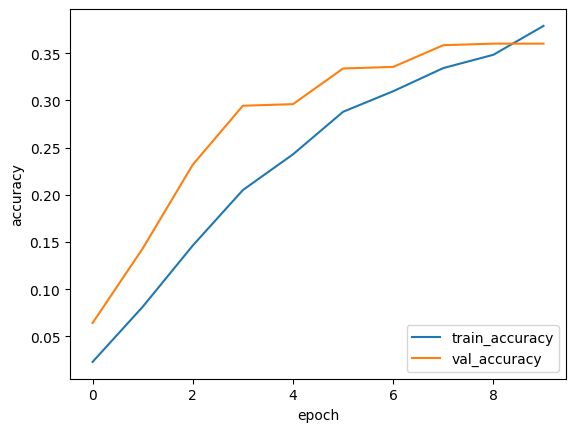

In [78]:

# model with dropout 0.2
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
# larger learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=10, validation_data=val_data)

print_results()


### overfitting seems to be fixed thanks to the dropout layer, increase the number of epochs to see if the accuracy keeps increasing

### let's now come up with a more complex network to see if that also helps further increase the accuracy of the model, let's add an extra dense layer and also more dropout layers 

Epoch 1/20


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 53s 192ms/step - accuracy: 0.0369 - loss: 4.8592

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 196ms/step - accuracy: 0.0371 - loss: 4.8573 - val_accuracy: 0.0082 - val_loss: 8.4661
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 193ms/step - accuracy: 0.1587 - loss: 3.7512 - val_accuracy: 0.0148 - val_loss: 7.7944
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 196ms/step - accuracy: 0.2668 - loss: 3.2276 - val_accuracy: 0.1102 - val_loss: 4.6878
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 195ms/step - accuracy: 0.3264 - loss: 2.8283 - val_accuracy: 0.2155 - val_loss: 3.6697
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 193ms/step - accuracy: 0.3663 - loss: 2.6855 - val_accuracy: 0.3750 - val_loss: 2.5737
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 194ms/step - accuracy: 0.4180 - loss: 2.4359 - val_accuracy: 0.3865 - val_loss: 2.5460
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 194ms/step - accuracy: 0.4548 - loss: 2.2566 - val_accuracy: 0.4572 - val_loss: 2.2152
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 194ms/step - accuracy: 0.4925 - loss: 2.0659 - val

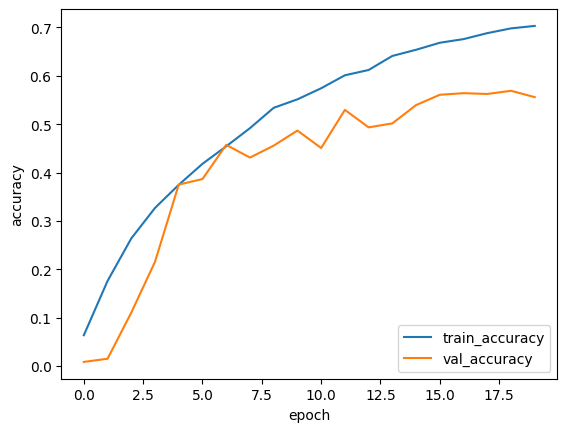

In [79]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),  # higher dropout to regularize

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=val_data)

print_results()


### seems like we're going in the right direction, let's now implement a dynamic learning rate

Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 55s 197ms/step - accuracy: 0.0303 - loss: 5.1895

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 201ms/step - accuracy: 0.0304 - loss: 5.1878 - val_accuracy: 0.0066 - val_loss: 14.6932
Epoch 2/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 205ms/step - accuracy: 0.0985 - loss: 4.1906 - val_accuracy: 0.0115 - val_loss: 8.8568
Epoch 3/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 202ms/step - accuracy: 0.1549 - loss: 3.7185 - val_accuracy: 0.0247 - val_loss: 6.2667
Epoch 4/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 202ms/step - accuracy: 0.2269 - loss: 3.3370 - val_accuracy: 0.1957 - val_loss: 3.7533
Epoch 5/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 201ms/step - accuracy: 0.2816 - loss: 3.0039 - val_accuracy: 0.2385 - val_loss: 3.2136
Epoch 6/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 201ms/step - accuracy: 0.3374 - loss: 2.7480 - val_accuracy: 0.3109 - val_loss: 3.0567
Epoch 7/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 204ms/step - accuracy: 0.3757 - loss: 2.5284 - val_accuracy: 0.4474 - val_loss: 2.0876
Epoch 8/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 203ms/step - accuracy: 0.4221 - loss: 2.3336 - va

2024-10-31 16:03:39.098696: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 205ms/step - accuracy: 0.5832 - loss: 1.6059 - val_accuracy: 0.5312 - val_loss: 1.7173
Epoch 16/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 202ms/step - accuracy: 0.5979 - loss: 1.5280 - val_accuracy: 0.5428 - val_loss: 1.7334
Epoch 17/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 202ms/step - accuracy: 0.6234 - loss: 1.4438 - val_accuracy: 0.5510 - val_loss: 1.6010
Epoch 18/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 216ms/step - accuracy: 0.6285 - loss: 1.3996 - val_accuracy: 0.5428 - val_loss: 1.5765
Epoch 19/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.6463 - loss: 1.3367 - val_accuracy: 0.5592 - val_loss: 1.5770
Epoch 20/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 215ms/step - accuracy: 0.6570 - loss: 1.2922 - val_accuracy: 0.5658 - val_loss: 1.5594
Epoch 21/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 216ms/step - accuracy: 0.6696 - loss: 1.2504 - val_accuracy: 0.5444 - val_loss: 1.6668
Epoch 22/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.6753 - loss: 1.216

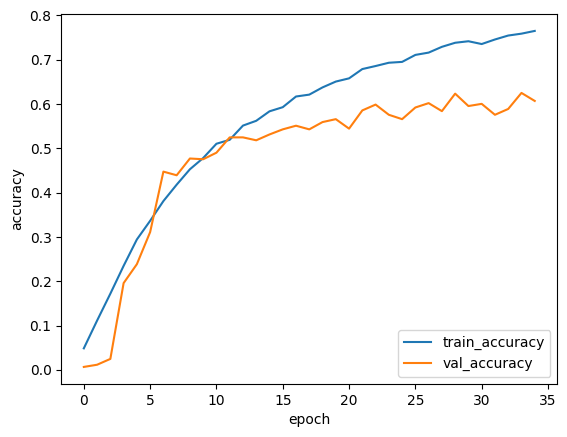

In [80]:
# this is the same as the model right above but with a changing learning rate
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


### let's double the units of every layer

Epoch 1/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 173s 707ms/step - accuracy: 0.0403 - loss: 5.2247 - val_accuracy: 0.0132 - val_loss: 11.8585
Epoch 2/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 151s 630ms/step - accuracy: 0.1194 - loss: 4.1228 - val_accuracy: 0.0230 - val_loss: 8.2876
Epoch 3/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 157s 652ms/step - accuracy: 0.1928 - loss: 3.5178 - val_accuracy: 0.0691 - val_loss: 5.1477
Epoch 4/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 150s 628ms/step - accuracy: 0.2656 - loss: 3.1204 - val_accuracy: 0.3240 - val_loss: 2.8189
Epoch 5/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 151s 630ms/step - accuracy: 0.3660 - loss: 2.6547 - val_accuracy: 0.3618 - val_loss: 2.6355
Epoch 6/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 153s 642ms/step - accuracy: 0.4173 - loss: 2.3317 - val_accuracy: 0.3766 - val_loss: 2.3900
Epoch 7/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 153s 639ms/step - accuracy: 0.4449 - loss: 2.2371 - val_accuracy: 0.4424 - val_loss: 2.1504
Epoch 8/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 155s 647ms/step - accuracy: 0.4990 

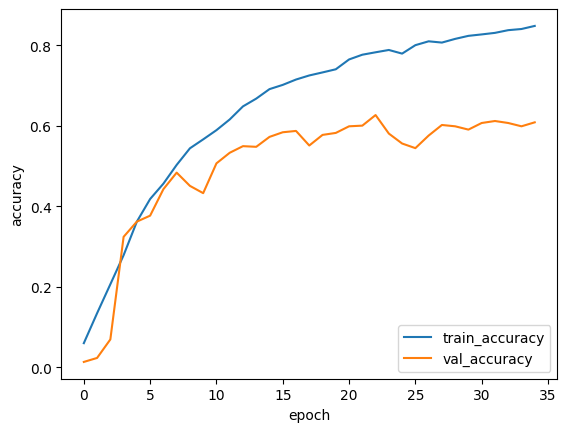

In [82]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3), 

        tf.keras.layers.Conv2D(1024, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


Epoch 1/35


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 62s 225ms/step - accuracy: 0.0218 - loss: 5.3628

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 63s 229ms/step - accuracy: 0.0219 - loss: 5.3611 - val_accuracy: 0.0115 - val_loss: 12.6391
Epoch 2/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 218ms/step - accuracy: 0.0677 - loss: 4.3854 - val_accuracy: 0.0099 - val_loss: 11.1479
Epoch 3/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 215ms/step - accuracy: 0.1013 - loss: 4.0754 - val_accuracy: 0.0082 - val_loss: 8.1964
Epoch 4/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.1317 - loss: 3.8214 - val_accuracy: 0.0164 - val_loss: 6.5145
Epoch 5/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.1543 - loss: 3.6232 - val_accuracy: 0.0230 - val_loss: 6.0689
Epoch 6/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 82s 213ms/step - accuracy: 0.1891 - loss: 3.4804 - val_accuracy: 0.0378 - val_loss: 5.9793
Epoch 7/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 214ms/step - accuracy: 0.2076 - loss: 3.3453 - val_accuracy: 0.0757 - val_loss: 4.6610
Epoch 8/35
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 215ms/step - accuracy: 0.2430 - loss: 3.2065 - v

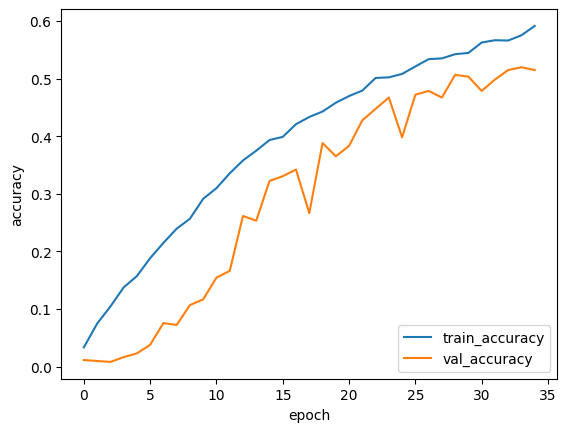

In [83]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5), 

        tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),  

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=5000,
    decay_rate=0.95)

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=35, validation_data=val_data)

print_results()


### seems like that didn't help...

### let's finally test with a static learning rate but more epochs

Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 59s 206ms/step - accuracy: 0.0358 - loss: 5.0007 - val_accuracy: 0.0132 - val_loss: 9.6804
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 55s 211ms/step - accuracy: 0.1286 - loss: 3.9491 - val_accuracy: 0.0181 - val_loss: 7.2259
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 212ms/step - accuracy: 0.2258 - loss: 3.3569 - val_accuracy: 0.1628 - val_loss: 3.8590
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 210ms/step - accuracy: 0.2875 - loss: 3.0538 - val_accuracy: 0.2549 - val_loss: 3.0700
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.3418 - loss: 2.7512 - val_accuracy: 0.3141 - val_loss: 2.8132
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.3823 - loss: 2.5852

2024-10-31 19:55:47.666369: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


227/227 ━━━━━━━━━━━━━━━━━━━━ 56s 213ms/step - accuracy: 0.3824 - loss: 2.5850 - val_accuracy: 0.3388 - val_loss: 2.9311
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 217ms/step - accuracy: 0.4281 - loss: 2.3865 - val_accuracy: 0.4030 - val_loss: 2.4366
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 58s 221ms/step - accuracy: 0.4536 - loss: 2.2457 - val_accuracy: 0.4227 - val_loss: 2.3243
Epoch 9/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 203ms/step - accuracy: 0.4949 - loss: 2.0788 - val_accuracy: 0.4145 - val_loss: 2.4062
Epoch 10/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 203ms/step - accuracy: 0.5182 - loss: 1.9709 - val_accuracy: 0.4523 - val_loss: 2.1962
Epoch 11/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 204ms/step - accuracy: 0.5551 - loss: 1.8195 - val_accuracy: 0.5164 - val_loss: 1.7719
Epoch 12/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 201ms/step - accuracy: 0.5562 - loss: 1.7573 - val_accuracy: 0.5477 - val_loss: 1.8188
Epoch 13/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 54s 207ms/step - accuracy: 0.5911 - loss: 1.6533 -

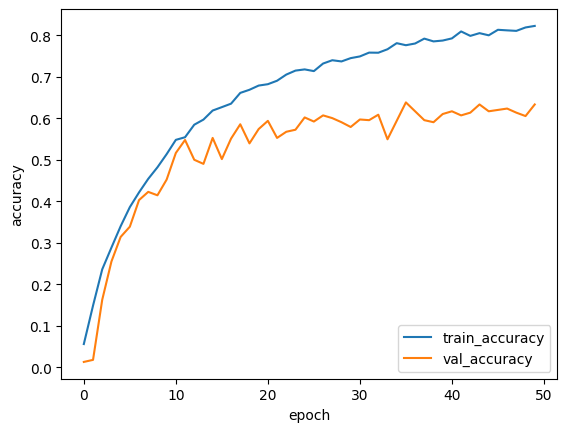

In [85]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),  
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(len(class_names), activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=val_data)

print_results()


Epoch 1/50


/opt/miniconda3/envs/ml/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    227/Unknown 116s 463ms/step - accuracy: 0.0555 - loss: 4.7835

/opt/miniconda3/envs/ml/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


227/227 ━━━━━━━━━━━━━━━━━━━━ 118s 472ms/step - accuracy: 0.0557 - loss: 4.7815 - val_accuracy: 0.0164 - val_loss: 7.3462
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 115s 475ms/step - accuracy: 0.1969 - loss: 3.5827 - val_accuracy: 0.0132 - val_loss: 7.6965
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 115s 474ms/step - accuracy: 0.3104 - loss: 2.9342 - val_accuracy: 0.3470 - val_loss: 2.6917
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 115s 472ms/step - accuracy: 0.3601 - loss: 2.7122 - val_accuracy: 0.3158 - val_loss: 3.1891
Epoch 5/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 115s 472ms/step - accuracy: 0.4084 - loss: 2.4738 - val_accuracy: 0.4178 - val_loss: 2.3405
Epoch 6/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 114s 470ms/step - accuracy: 0.4545 - loss: 2.2691 - val_accuracy: 0.4786 - val_loss: 1.9867
Epoch 7/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 115s 475ms/step - accuracy: 0.4750 - loss: 2.1431 - val_accuracy: 0.4720 - val_loss: 2.0376
Epoch 8/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 114s 470ms/step - accuracy: 0.5030 - loss: 1.97

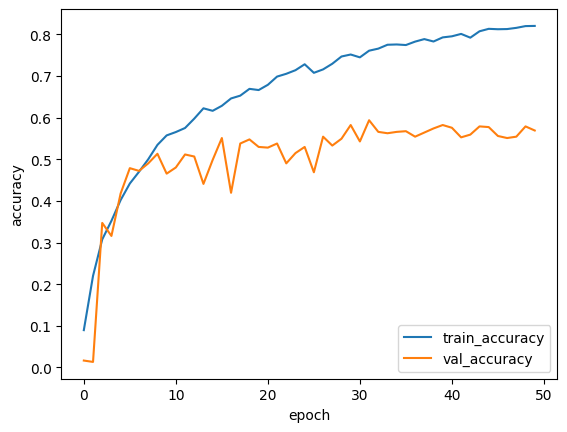

In [86]:
# Model architecture
model = tf.keras.models.Sequential([
    # First convolutional block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),

    # Flatten and Dense layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')  # Output layer for 101 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=val_data)

print_results()